Minst Dataset Classification

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
#Loading the MNIST dataset

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
len(X_train), len(y_train), len(x_test), len(y_test)

(60000, 60000, 10000, 10000)

In [7]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

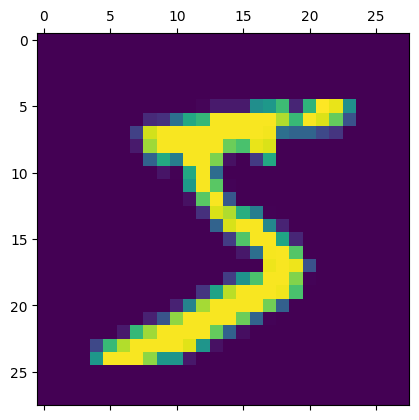

In [11]:
plt.matshow(X_train[0])

In [13]:
y_train[0]

5

In [14]:
# Scaling the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [16]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Simple Neuron Netwrok with no Hidden Layers

In [17]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                  keras.layers.Dense(10, activation='sigmoid')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5)

c:\Users\hariharan\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8200 - loss: 0.7187
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9131 - loss: 0.3090
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9211 - loss: 0.2878
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9229 - loss: 0.2779
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9257 - loss: 0.2719


In [18]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9159 - loss: 0.3032


[0.2663041949272156, 0.9269999861717224]

In [19]:
y_pred = model.predict(X_test)
y_pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([2.1387329e-02, 2.9272749e-07, 5.6250393e-02, 9.5645273e-01,
       2.6469741e-03, 1.1764168e-01, 1.0428193e-06, 9.9977750e-01,
       1.0090357e-01, 5.9725064e-01], dtype=float32)

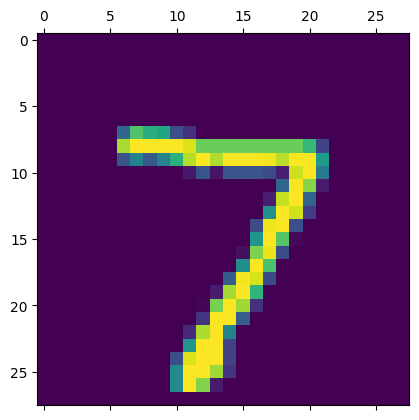

In [20]:
plt.matshow(X_test[0])

In [21]:
np.argmax(y_pred[0])

7

Using Hidden Layer

In [24]:
model_1 = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                  keras.layers.Dense(100, activation='relu'),
                  keras.layers.Dense(10, activation='sigmoid')])

model_1.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model_1.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8664 - loss: 0.4532
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9612 - loss: 0.1311
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9739 - loss: 0.0886
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9811 - loss: 0.0614
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9851 - loss: 0.0491


In [25]:
model_1.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9737 - loss: 0.0873


[0.07978498190641403, 0.9757999777793884]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


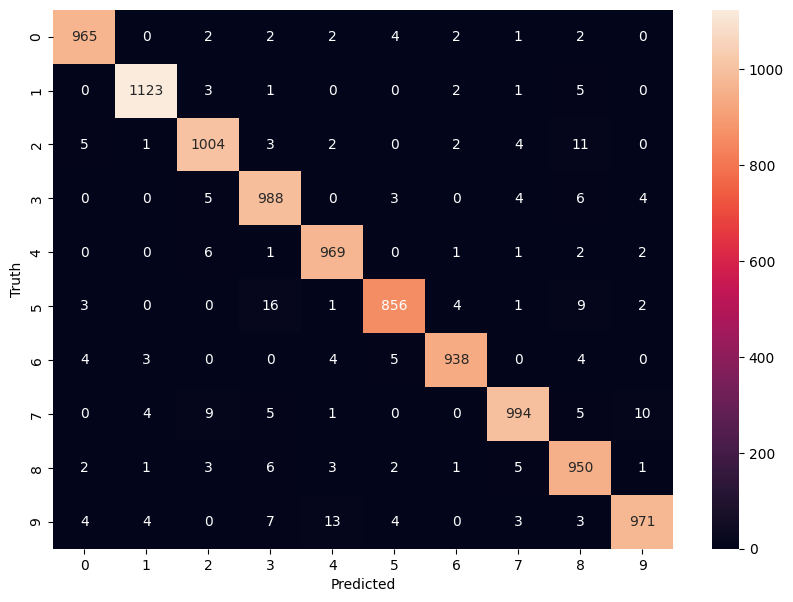

In [28]:
y_pred_1 = model_1.predict(X_test)
y_pred_1_labels = [np.argmax(i) for i in y_pred_1]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_1_labels)

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Conclusion : By Adding one Hidden layer our model performance improved from 92% to 97%.